In [1]:
from trial_analysis_helper import *
import pandas as pd

In [2]:
input_path = r'intern_exercise.csv'
output_path = r'clinical_trial_results.xlsx'
df = load_trial_data(input_path)
df.head(3)

Loaded 184 clinical trials from intern_exercise.csv


,title,objective,outcome_details,phase,primary_completion_date,primary_endpoints_reported_date,prior_concurrent_therapy,start_date,study_design,treatment_plan,...,results_json,study_keywords_json,tags_json,primary_drugs_tested_json,other_drugs_tested_json,therapeutic_areas_json,bmt_other_drugs_tested_json,bmt_primary_drugs_tested_json,ct_gov_listed_locations_json,ct_gov_mesh_terms_json
0,"A Phase 1 Randomized, Double Blinded, Placebo-...",To evaluate anti-IL-4 alpha monoclonal antibod...,NaN,I,2021-08-13,NaN,NaN,2020-09-09,Study Type :\tInterventional (Clinical Trial...,Subjects will receive anti-IL-4 alpha monoclon...,...,"[{""date"": ""2023-03-22T00:00:00Z"", ""details"": ""...","[""double blind/blinded"", ""immunogenicity"", ""mu...",[],"[{""drugApprovalStatus"": ""Unapproved"", ""drugId""...",[],"[{""id"": 9, ""name"": ""Autoimmune/Inflammation"", ...",[],"[{""bmtBrandName"": ""611"", ""bmtDrugId"": 42756, ""...","[{""country"": ""United States"", ""sitesCount"": 1}]","[{""meshTerm"": ""Dermatitis, Atopic""}, {""meshTer..."
1,"A Prospective, Randomized, Double Blind, Paral...",To study the biosimilarity/bioquivalence in EP...,NaN,IV,2019-06-01,NaN,NaN,2015-08-01,Study Type: Interventional (Clinical Trial)\nS...,Active Comparator: Reference group\nDrug: EPRE...,...,[],"[""bioequivalence"", ""double blind/blinded"", ""ef...",[],"[{""drugApprovalStatus"": ""Approved"", ""drugId"": ...","[{""drugApprovalStatus"": ""Approved"", ""drugId"": ...","[{""id"": 2, ""name"": ""Metabolic/Endocrinology"", ...","[{""bmtBrandName"": ""epogen"", ""bmtDrugId"": 25, ""...","[{""bmtBrandName"": ""epiao"", ""bmtDrugId"": 18545,...","[{""country"": ""Thailand"", ""sitesCount"": 8}]","[{""meshTerm"": ""Anemia""}]"
2,"A Prospective, Randomized, Double Blind, Paral...",To establish the bio-similarity/bioequivalence...,EPIAO® demonstrated promising effectiveness an...,III,2021-10-09,NaN,NaN,2015-12-01,Study Type: Interventional\nStudy Design: Allo...,Subjects will receive Eprex to EPIAO with a 1:...,...,"[{""date"": ""2022-11-24T00:00:00Z"", ""details"": ""...","[""bioequivalence"", ""double blind/blinded"", ""ef...",[],"[{""drugApprovalStatus"": ""Approved"", ""drugId"": ...","[{""drugApprovalStatus"": ""Approved"", ""drugId"": ...","[{""id"": 2, ""name"": ""Metabolic/Endocrinology"", ...","[{""bmtBrandName"": ""epogen"", ""bmtDrugId"": 25, ""...","[{""bmtBrandName"": ""epiao"", ""bmtDrugId"": 18545,...","[{""country"": ""Russian Federation"", ""sitesCount...","[{""meshTerm"": ""Anemia""}]"


In [3]:
# Discover molecular targets
min_target_frequency = 2 # Minimum number of mentions to consider molecular target valid
targets = discover_molecular_targets(df, min_target_frequency, verbose=True)

Discovered 29 unique candidates
Filtering for frequency >= 2...

--------------------------------------------------------------------------------
  PD-1                           mentioned  59 times
  HER2                           mentioned  49 times
  VEGF                           mentioned  45 times
  IL-5                           mentioned  42 times
  IL-17A                         mentioned  40 times
  ERYTHROPOIETIN                 mentioned  21 times
  IL-1                           mentioned  17 times
  IL-4R                          mentioned  10 times
  IL-1BETA                       mentioned  10 times
  PD-L1                          mentioned   9 times
  CD20                           mentioned   7 times
  TUMOR NECROSIS FACTOR          mentioned   7 times
  INTERLEUKIN-4 RECEPTOR         mentioned   6 times
  INTERLEUKIN-4                  mentioned   6 times
  BDCA2                          mentioned   4 times
  TNF ALPHA                      mentioned   4 times
  IL-4

Processed 50/184 trials...
Processed 100/184 trials...
Processed 150/184 trials...


<Axes: xlabel='Innovation'>

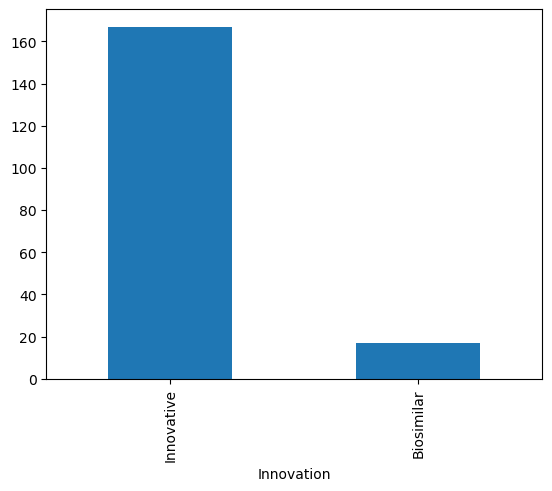

In [4]:
results = analyze_all_trials(df, targets)
results['Innovation'].value_counts().plot(kind='bar')

In [5]:
# save results
save_results(results, targets, output_path)

✓ Results saved to: clinical_trial_results.xlsx
